## Creación de Dask Bags

### Pasos previos

In [1]:
!pip install "dask[complete]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 837 kB 3.2 MB/s 
     |████████████████████████████████| 141 kB 74.1 MB/s 
     |████████████████████████████████| 830 kB 46.6 MB/s 
     |████████████████████████████████| 822 kB 44.2 MB/s 
     |████████████████████████████████| 802 kB 38.2 MB/s 
     |████████████████████████████████| 802 kB 50.1 MB/s 
     |████████████████████████████████| 793 kB 51.5 MB/s 
     |████████████████████████████████| 793 kB 49.3 MB/s 
     |████████████████████████████████| 791 kB 48.8 MB/s 
     |████████████████████████████████| 786 kB 44.3 MB/s 
     |████████████████████████████████| 779 kB 49.6 MB/s 
     |████████████████████████████████| 778 kB 52.5 MB/s 
     |████████████████████████████████| 776 kB 46.2 MB/s 
     |████████████████████████████████| 769 kB 52.0 MB/s 
     |████████████████████████████████| 766 kB 52.2 MB/s 
     |██████████████████████████

In [2]:
import dask.bag as db

###  Puedes leer de multiples archivos



In [3]:
url = 'https://raw.githubusercontent.com/jr-marquez/DataScienceData/master/daily-stock.tgz'
!curl {url} | tar xz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.8M  100 19.8M    0     0  12.4M      0  0:00:01  0:00:01 --:--:-- 12.4M


In [4]:
import json
stocks = db.read_text('daily-stock/*.json').map(json.loads)

In [5]:
stocks.npartitions

22

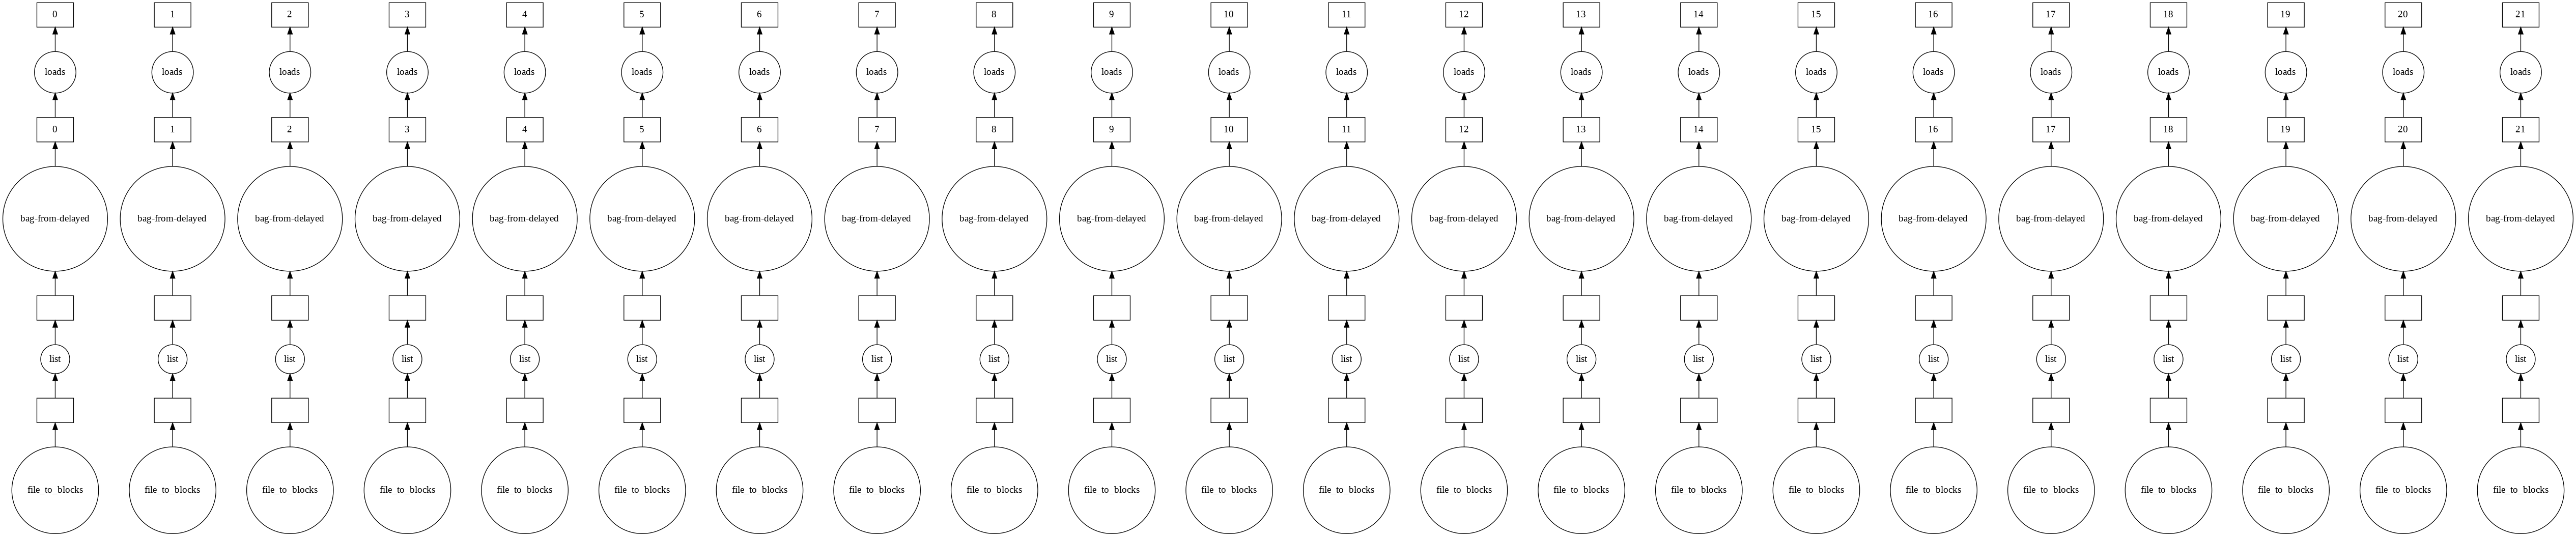

In [7]:
stocks.visualize()

## Se pueden crear desde una secuencia

In [8]:
first_names = ['John', 'Jimmy', 'Bob', 'Alice', 'Rebbecca',
               'Rahul', 'Robin','Eva', 'Monika', 'Raman', 'Jay',
               'Chris', 'Lee', 'Bruce', 'Alan', 'Arthur',
               'Peter', 'Johnny', 'Sasha', 'Meera', 'Lily',
               'Aaron']


In [9]:
seq_bag = db.from_sequence(first_names, npartitions=3)

In [10]:
second_name_bag = db.from_sequence(first_names, npartitions=3).map(lambda x: x + ' Generic Second Name')

In [13]:
second_name_bag.take(3)

('John Generic Second Name',
 'Jimmy Generic Second Name',
 'Bob Generic Second Name')

## Creando Dask Bags desde URLs



### Referencia : https://www.gutenberg.org/

In [14]:
pride_prejudice_bag = db.from_url('https://www.gutenberg.org/files/1342/1342-0.txt')

In [15]:
pride_prejudice_bag.take(20)

(b'\xef\xbb\xbfThe Project Gutenberg eBook of Pride and Prejudice, by Jane Austen\r\n',
 b'\r\n',
 b'This eBook is for the use of anyone anywhere in the United States and\r\n',
 b'most other parts of the world at no cost and with almost no restrictions\r\n',
 b'whatsoever. You may copy it, give it away or re-use it under the terms\r\n',
 b'of the Project Gutenberg License included with this eBook or online at\r\n',
 b'www.gutenberg.org. If you are not located in the United States, you\r\n',
 b'will have to check the laws of the country where you are located before\r\n',
 b'using this eBook.\r\n',
 b'\r\n',
 b'Title: Pride and Prejudice\r\n',
 b'\r\n',
 b'Author: Jane Austen\r\n',
 b'\r\n',
 b'Release Date: June, 1998 [eBook #1342]\r\n',
 b'[Most recently updated: August 23, 2021]\r\n',
 b'\r\n',
 b'Language: English\r\n',
 b'\r\n',
 b'Character set encoding: UTF-8\r\n')

#### Otros metodos: `read_avro` y `from_delayed`. ver http://docs.dask.org/en/latest/bag-creation.html# 

# Almacenando Dask Bags

### `to_text_files`

In [16]:
books_url = ['https://www.gutenberg.org/files/84/84-0.txt',
            'https://www.gutenberg.org/files/11/11-0.txt',
            'https://www.gutenberg.org/files/98/98-0.txt',
            'https://www.gutenberg.org/files/2600/2600-0.txt']
books_data = db.from_url(books_url)

In [17]:
books_data.npartitions

4

In [18]:
books_data.to_textfiles('user_data/processed_*.txt')

['/content/user_data/processed_0.txt',
 '/content/user_data/processed_1.txt',
 '/content/user_data/processed_2.txt',
 '/content/user_data/processed_3.txt']

### Se pueden específcar nombres custom

In [19]:
def file_name_func(x):
    return 'part_' + str(x)

In [20]:
books_data.to_textfiles('user_data/processed_*.txt',
                                name_function=file_name_func)

['/content/user_data/processed_part_0.txt',
 '/content/user_data/processed_part_1.txt',
 '/content/user_data/processed_part_2.txt',
 '/content/user_data/processed_part_3.txt']